In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score,classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

import xgboost as xgb
import shap

import seaborn as sns

In [2]:
%load_ext kedro.ipython

[06/25/24 15:18:57] INFO     Registered line magic '%reload_kedro'                                   ]8;id=989699;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=175966;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=742417;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=229712;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=30886;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=963221;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\carga\Documents\KedroTutorial\montrealfirepredicition.                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/25/24 15:18:59] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\integrations\kedro\hooks.py:13: KedroDeprecationWarning:                       
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\laz                
                             y_loader\__init__.py:83: KedroDeprecationWarning: 'GeoJSONDataSet' has                
                             been renamed to 'GeoJSONDataset', and the alias will be removed in                    
                             Kedro-Datasets 2.0.0                                                                  
                               attr = getattr(submod, name)                                                        
                                                                                                                   

                    INFO     Kedro project montrealfirepredicition                                  ]8;id=317221;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=714875;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=354601;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=617122;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[06/25/24 15:19:00] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\models\flowchart.py:13: KedroDeprecationWarning:                               
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\ked                
                             ro_viz\data_access\repositories\catalog.py:8: KedroDeprecationWarning:                
                             'TRANSCODING_SEPARATOR' has been moved to                                             
                             'kedro.pipeline.transcoding', and the alias will be removed in Kedro                  
                             0.20.0                                                                                
                               from kedro.pipeline.pipeline import TRANSCODING_SEPARATOR,                          
                             _strip_transcoding                                                                    
                                                                                                                   

[06/25/24 15:19:01] INFO     Registered line magic 'run_viz'                                        ]8;id=203591;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=632902;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\ipython\__init__.py#148\148]8;;\

In [3]:
catalog.list()


[
    'incidents',
    'firestations',
    'firestation_areas',
    'census',
    'property_assessments',
    'combined_incidents',
    'preprocessed_incidents',
    'preprocessed_firestations',
    'preprocessed_firestation_areas',
    'preprocessed_property_assessments',
    'enhanced_incidents',
    'parameters'
]

In [4]:
df_incidents = catalog.load('enhanced_incidents')
df_incidents.head()

                    INFO     Loading data from enhanced_incidents (CSVDataset)...               ]8;id=868849;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=839305;file://C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\kedro\io\data_catalog.py#508\508]8;;\

,FIRE_STATION_ID,CREATION_DATE,INCIDENT_CATEGORY,AREA_ID,INCIDENT_NBR,INCIDENT_TYPE,LATITUDE,LONGITUDE,UNITS,AREA,CREATION_TIME,is_fire,day_of_week,month
0,18,2005-01-01,Sans incendie,21,1,Inondation,45.620274,-73.619956,1,Montréal-Nord,00:03:47,False,5,1
1,10,2005-01-01,Alarmes-incendies,18,2,Alarme privé ou locale,45.494087,-73.582587,7,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,00:03:56,False,5,1
2,72,2005-01-01,Alarmes-incendies,13,3,Alarme privé ou locale,45.484406,-73.693038,6,St-Laurent,00:03:57,False,5,1
3,13,2005-01-01,Sans incendie,23,4,Inondation,45.541383,-73.545944,1,Mercier / Hochelaga-Maisonneuve,00:05:01,False,5,1
4,18,2005-01-01,Sans incendie,21,5,Inondation,45.611304,-73.632440,1,Montréal-Nord,00:06:20,False,5,1


In [5]:
# Prepare the data for logistic regression
features = ['LATITUDE', 'LONGITUDE', 'day_of_week', 'month']
X = df_incidents[features]
y = df_incidents['is_fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probabilities on the test set
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, log_reg.predict(X_test_scaled))
report = classification_report(y_test, log_reg.predict(X_test_scaled))

accuracy, report


[06/25/24 15:19:48] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   


(
    0.9541390715571826,
    '              precision    recall  f1-score   support\n\n       False       0.95      1.00      0.98    367230\n        True       0.00      0.00      0.00     17651\n\n    accuracy                           0.95    384881\n   macro avg       0.48      0.50      0.49    384881\nweighted avg       0.91      0.95      0.93    384881\n'
)

In [6]:
# Filter the dataset for fire incidents
df_incidents['is_fire'] = df_incidents['is_fire'].astype(int)

In [7]:
# Prepare the data for logistic regression
features = ['LATITUDE', 'LONGITUDE', 'day_of_week', 'month']
X = df_incidents[features]
y = df_incidents['is_fire']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

[06/25/24 11:21:26] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

[06/25/24 11:21:27] WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

                    WARNING  C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python. warnings.py:109
                             3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skl                
                             earn\metrics\_classification.py:1471: UndefinedMetricWarning:                         
                             Precision and F-score are ill-defined and being set to 0.0 in labels                  
                             with no predicted samples. Use `zero_division` parameter to control                   
                             this behavior.                                                                        
                               _warn_prf(average, modifier, msg_start, len(result))                                
                                                                                                                   

Accuracy: 0.9541390715571826
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    367230
           1       0.00      0.00      0.00     17651

    accuracy                           0.95    384881
   macro avg       0.48      0.50      0.49    384881
weighted avg       0.91      0.95      0.93    384881

ROC AUC Score: 0.5167439189495516


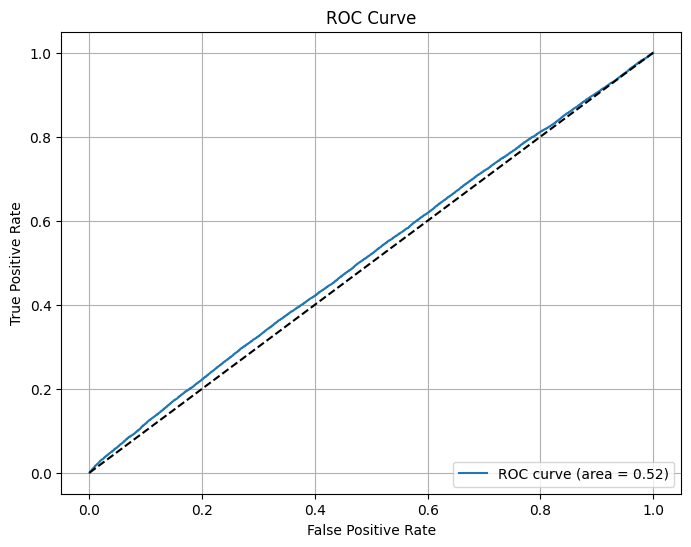

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [8]:
# Prepare the data for logistic regression
features = ['LATITUDE', 'LONGITUDE', 'day_of_week', 'month']
X = df_incidents[features]
y = df_incidents['is_fire']

# Print class distribution before SMOTE
print('Class distribution before SMOTE:')
print(y.value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution after SMOTE
print('Class distribution after SMOTE:')
print(y_resampled.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

Class distribution before SMOTE:
is_fire
0    1834545
1      89857
Name: count, dtype: int64
Class distribution after SMOTE:
is_fire
0    1834545
1    1834545
Name: count, dtype: int64


Accuracy: 0.5101932631796985
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51    366919
           1       0.51      0.51      0.51    366899

    accuracy                           0.51    733818
   macro avg       0.51      0.51      0.51    733818
weighted avg       0.51      0.51      0.51    733818

ROC AUC Score: 0.5150962081099602


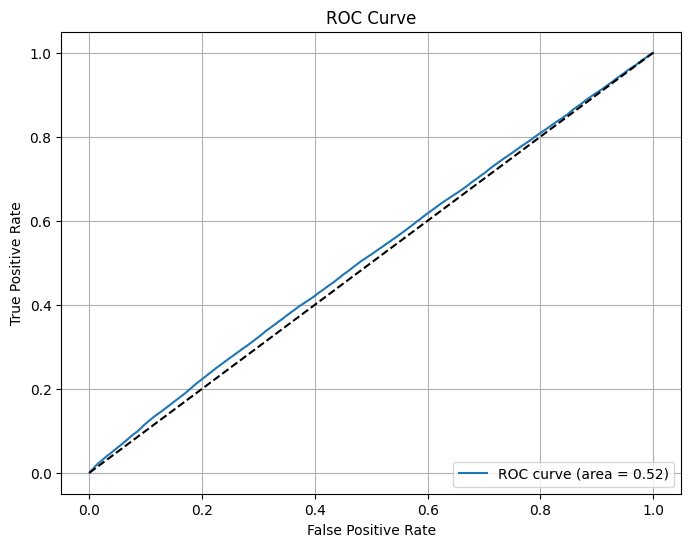

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [10]:
# Print min and max of LATITUDE and LONGITUDE to ensure they are within expected ranges
lat_min, lat_max = df_incidents['LATITUDE'].min(), df_incidents['LATITUDE'].max()
lon_min, lon_max = df_incidents['LONGITUDE'].min(), df_incidents['LONGITUDE'].max()
print(f'Latitude range: {lat_min} to {lat_max}')
print(f'Longitude range: {lon_min} to {lon_max}')

Latitude range: 0.0 to 45.703664
Longitude range: -76.2372899207018 to -73.4792604367093


In [11]:
# Prepare the data for modeling
features = ['LATITUDE', 'LONGITUDE', 'day_of_week', 'month']
X = df_incidents[features]
y = df_incidents['is_fire']

# Print class distribution before SMOTE
print('Class distribution before SMOTE:')
print(y.value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution after SMOTE
print('Class distribution after SMOTE:')
print(y_resampled.value_counts())

Class distribution before SMOTE:
is_fire
0    1834545
1      89857
Name: count, dtype: int64
Class distribution after SMOTE:
is_fire
0    1834545
1    1834545
Name: count, dtype: int64


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.8560760297512462
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.86      0.86    366919
        True       0.86      0.85      0.86    366899

    accuracy                           0.86    733818
   macro avg       0.86      0.86      0.86    733818
weighted avg       0.86      0.86      0.86    733818

ROC AUC Score: 0.9288470047363706


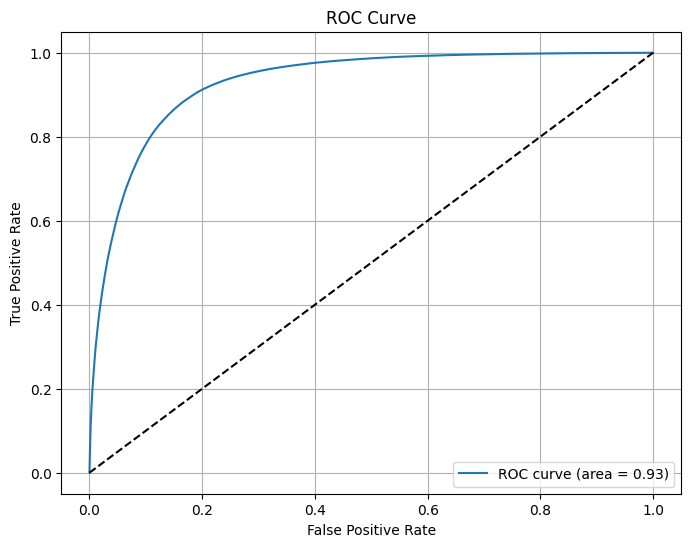

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

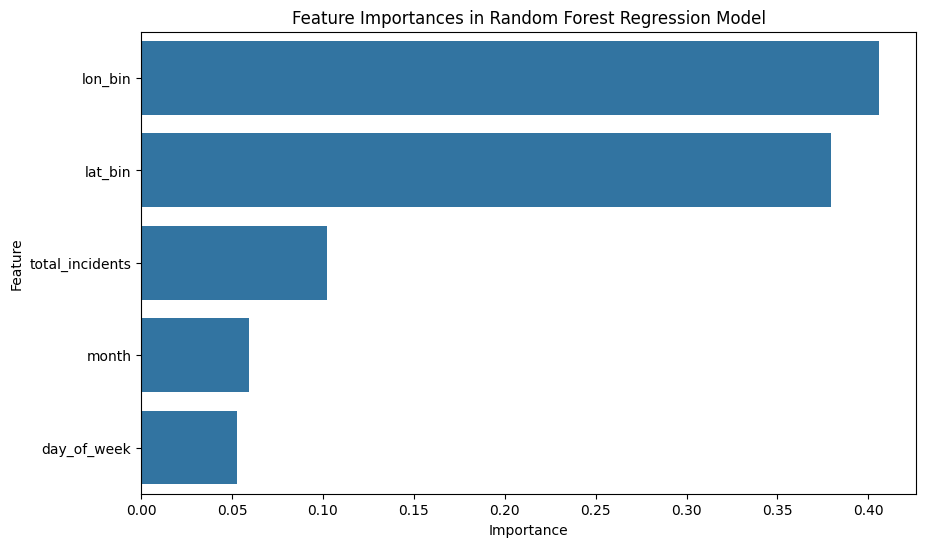

In [32]:
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances in Random Forest Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [72]:
# Predict on a subset of the data using the model
X_pred = X.copy().sample(frac=0.005, random_state=42)

# Assuming prediction for Monday on June
X_pred['day_of_week'] = 0
X_pred['month'] = 6

# Standardize the grid points
X_pred_scaled = scaler.transform(X_pred)

# Predict the probability of fire for each grid point
X_pred.loc[:,'fire_prob'] = rf_model.predict_proba(X_pred_scaled)[:, 1]

In [76]:
# Create the base map
map_center = [df_incidents['LATITUDE'].mean(), df_incidents['LONGITUDE'].mean()]
base_map = folium.Map(location=map_center, zoom_start=12)

# Prepare data for the heatmap
heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['fire_prob']] for index, row in X_pred.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(base_map)

In [ ]:
base_map

In [75]:
from datetime import datetime, timedelta
import os
from selenium import webdriver
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [77]:
# Create a folder to save the heatmap images
if not os.path.exists('heatmaps'):
    os.makedirs('heatmaps')

In [114]:
X_pred = X.copy().sample(frac=0.005, random_state=42)    
X_pred_scaled = scaler.transform(X_pred)
X_pred['fire_prob']= rf_model.predict_proba(X_pred_scaled)[:, 1]

In [117]:
# Function to generate heatmap for a specific date
def generate_heatmap(date):
    day_of_week = date.weekday()
    month = date.month

    X_pred['day_of_week'] = day_of_week
    X_pred['month'] = month
 
    # Create the base map
    map_center = [df_incidents['LATITUDE'].mean(), df_incidents['LONGITUDE'].mean()]
    base_map = folium.Map(location=map_center, zoom_start=12)
    
    # Prepare data for the heatmap
    heat_data = [[row['LATITUDE'], row['LONGITUDE'], row['fire_prob']] for index, row in X_pred.iterrows()]
    
    # Add heatmap layer
    HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(base_map)
    
    # Save the map to an HTML file
    base_map.save(f'heatmaps/heatmap_{date.strftime("%Y%m%d")}.html')

# Generate heatmaps for each day of the year
start_date = datetime(2005, 1, 1)
end_date = datetime(2005, 12, 31)
current_date = start_date

while current_date <= end_date:
    generate_heatmap(current_date)
    current_date += timedelta(days=1)

# Convert the HTML heatmaps to images
def save_heatmap_image(html_path, image_path):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    driver.get(f'file://{os.path.abspath(html_path)}')
    driver.save_screenshot(image_path)
    driver.quit()

html_files = [f'heatmaps/heatmap_{(start_date + timedelta(days=i)).strftime("%Y%m%d")}.html' for i in range((end_date - start_date).days + 1)]
image_files = [f'heatmaps/heatmap_{(start_date + timedelta(days=i)).strftime("%Y%m%d")}.png' for i in range((end_date - start_date).days + 1)]

for html_file, image_file in zip(html_files, image_files):
    save_heatmap_image(html_file, image_file)

# Create an animation from the images
fig, ax = plt.subplots()

def update(frame):
    img = plt.imread(image_files[frame])
    ax.imshow(img)
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=len(image_files), repeat=False)
ani.save('fire_probabilities_animation.mp4', fps=5)

print("Animation saved as 'fire_probabilities_animation.mp4'")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:28                                                                                   │
│                                                                                                  │
│   25 current_date = start_date                                                                   │
│   26                                                                                             │
│   27 while current_date <= end_date:                                                             │
│ ❱ 28 │   generate_heatmap(current_date)                                                          │
│   29 │   current_date += timedelta(days=1)                                                       │
│   30                                                                                             │
│   31 # Convert the HTML heatmaps to images                                                       │
│                                                                                                  │
│ in generate_heatmap:20                                                                           │
│                                                                                                  │
│   17 │   HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(base_map)                     │
│   18 │                                                                                           │
│   19 │   # Save the map to an HTML file                                                          │
│ ❱ 20 │   base_map.save(f'heatmaps/heatmap_{date.strftime("%Y%m%d")}.html')                       │
│   21                                                                                             │
│   22 # Generate heatmaps for each day of the year                                                │
│   23 start_date = datetime(2005, 1, 1)                                                           │
│                                                                                                  │
│ C:\Users\carga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCac │
│ he\local-packages\Python38\site-packages\branca\element.py:197 in save                           │
│                                                                                                  │
│   194 │   │                                                                                      │
│   195 │   │   root = self.get_root()                                                             │
│   196 │   │   html = root.render(**kwargs)                                                       │
│ ❱ 197 │   │   fid.write(html.encode("utf8"))                                                     │
│   198 │   │   if close_file:                                                                     │
│   199 │   │   │   fid.close()                                                                    │
│   200                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OSError: [Errno 28] No space left on device

In [17]:
# Create a spatial grid
lat_min, lat_max = df_incidents['LATITUDE'].min(), df_incidents['LATITUDE'].max()
lon_min, lon_max = df_incidents['LONGITUDE'].min(), df_incidents['LONGITUDE'].max()

n_lat_bins = 1000
n_lon_bins = 1000

df_incidents['lat_bin'] = np.floor(np.linspace(0, n_lat_bins, len(df_incidents)) * (df_incidents['LATITUDE'] - lat_min) / (lat_max - lat_min)).astype(int)
df_incidents['lon_bin'] = np.floor(np.linspace(0, n_lon_bins, len(df_incidents)) * (df_incidents['LONGITUDE'] - lon_min) / (lon_max - lon_min)).astype(int)

# Aggregate incidents within each grid element
grid_counts = df_incidents.groupby(['lat_bin', 'lon_bin', 'month', 'day_of_week']).agg(
    total_incidents=('is_fire', 'size'),
    fire_incidents=('is_fire', 'sum'),
    non_fire_incidents=('is_fire', lambda x: len(x) - x.sum())
).reset_index()

In [18]:
grid_counts.head()

,lat_bin,lon_bin,month,day_of_week,total_incidents,fire_incidents,non_fire_incidents
0,0,0,1,0,233,25,208
1,0,0,1,1,212,23,189
2,0,0,1,2,224,22,202
3,0,0,1,3,280,22,258
4,0,0,1,4,262,22,240


In [21]:
# Prepare the data for modeling
features = ['lat_bin', 'lon_bin', 'month', 'day_of_week']
X = grid_counts[features]
y = (grid_counts['fire_incidents'] > 0).astype(int)  # Binary target: whether there was a fire or not

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)


# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.8847048855927532
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88    171994
           1       0.86      0.92      0.89    172652

    accuracy                           0.88    344646
   macro avg       0.89      0.88      0.88    344646
weighted avg       0.89      0.88      0.88    344646

ROC AUC Score: 0.9490650458480325


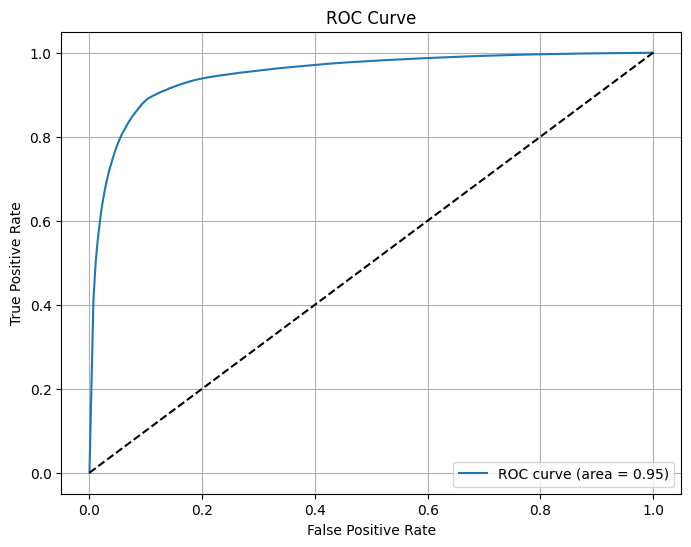

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [23]:
# Create a base map centered around the area of interest
map_center = [(lat_min + lat_max) / 2, (lon_min + lon_max) / 2]
base_map = folium.Map(location=map_center, zoom_start=12)

# Predict the probability of fire for each grid cell
grid_counts['prob_fire'] = rf_model.predict_proba(scaler.transform(grid_counts[features]))[:, 1]

# Prepare data for the heatmap
heat_data = []
lat_step = (lat_max - lat_min) / n_lat_bins
lon_step = (lon_max - lon_min) / n_lon_bins

for _, row in grid_counts.iterrows():
    lat = lat_min + row['lat_bin'] * lat_step + lat_step / 2
    lon = lon_min + row['lon_bin'] * lon_step + lon_step / 2
    heat_data.append([lat, lon, row['prob_fire']])

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(base_map)

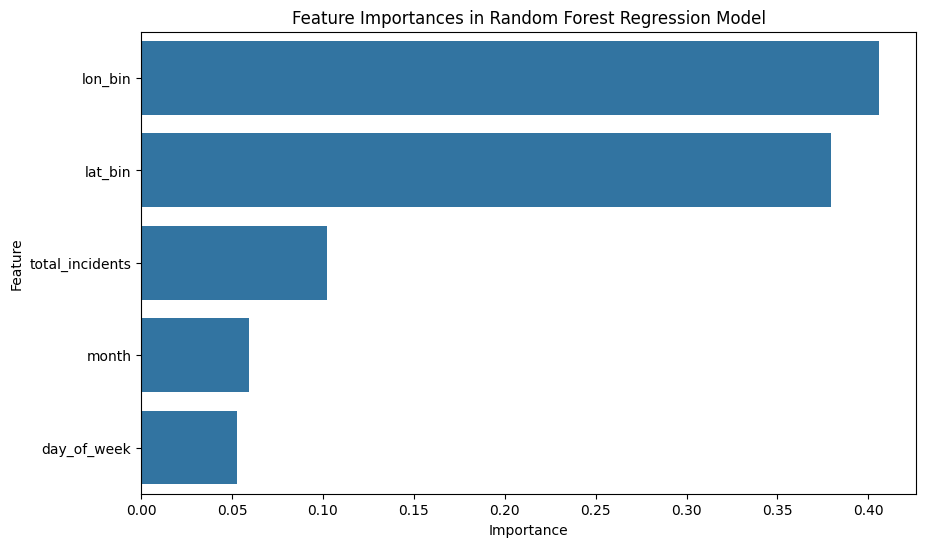

In [31]:
# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances in Random Forest Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()